In [1]:
from utils import *
from fluxtower_parse import *
from eddy_flux import * 
import numpy as np      
import datetime as dt
from scipy.signal import medfilt, detrend, coherence, windows


In [2]:
# Input processed data location
d_loc = '/Volumes/Data/ICECAPSarchive/fluxtower/processed/'

# Output location
out_loc = '/Users/heather/ICECAPS-ACE/Processed/'

# Start and stop date:
start = dt.datetime(2019,7,15,0,0)
stop = dt.datetime(2019,8,15,0,0)

# Paramters
avp = 15 # averaging period (minutes)
sf = 10.0 # Metek sampling frequency (HZ)

# Days to loop through
days = pd.date_range(start,stop,freq='1D')

## Start loop ##
for day in days:
    day_str = str(day.date()) 
    print(day_str)
    times = pd.date_range(day, day+pd.Timedelta(hours=24),freq='15min')[0:-1]

    # Get metek data
    m1_orig = pd.read_csv(d_loc+'metek/metek1_%s'%day_str, index_col=0, parse_dates=[0])
    if m1_orig.empty:
        print('Error: File empty, '+day_str)
        continue

    # Clean metek data 
    m1 = clean_metek(m1_orig)

    # Cross-wind temperature correction
    m1['T'] = Ts_sidewind_correction(m1['T'].astype(float),m1['x'].astype(float),m1['y'].astype(float),m1['z'].astype(float))

    # Rotate to average streamline for each 15 minute period. 
    m_rot = rotate_to_run(m1,avp)

    # Calculate sensible heat flux. 
    w = m_rot['w']
    T = m_rot['T']
    SHF,std=shf(w,T,avp)

    # Get licor data
    licor = pd.read_csv(d_loc+'LiCOR/licor_%s'%day_str, index_col=0, parse_dates=[0])

    # Calculate latent heat flux
    T = licor['T']
    P = licor['P']
    Nconc = licor['H2OD']
    w = m_rot['w']
    LHF = lhf(w,T,P,Nconc,avp)

    # Build dataframe
    flux_pro = pd.DataFrame(columns=['Dates', 'SHF', 'LHF'])
    flux_pro['Dates']=times
    flux_pro['SHF']=SHF
    flux_pro['LHF']=LHF
    flux_pro = flux_pro.set_index('Dates')

    # Save processed data
    flux_pro.to_csv(out_loc+'FluxPro_%s'%day_str)

2019-07-15
2019-07-16
2019-07-17
2019-07-18
2019-07-19
2019-07-20
2019-07-21
2019-07-22
2019-07-23
2019-07-24
2019-07-25
2019-07-26
2019-07-27
2019-07-28
2019-07-29
2019-07-30
2019-07-31
2019-08-01
2019-08-02
2019-08-03
2019-08-04
2019-08-05
2019-08-06
2019-08-07
2019-08-08
2019-08-09
2019-08-10


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [3]:
m1_orig

,Status,x,y,z,T
Date,,,,,


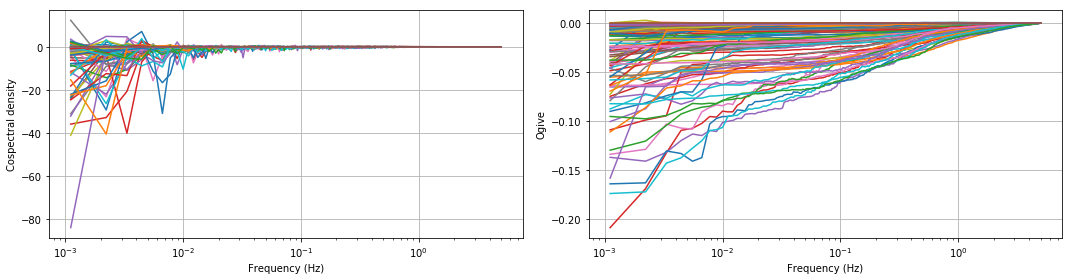

In [ ]:
# Plot co spectral density and ogive function.

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
ax1.grid(True)
for i in range(0,len(f)):
    ax1.semilogx(f[i],Csdxy[i],label='cospectra')
ax1.set_ylabel('Cospectral density')
ax1.set_xlabel('Frequency (Hz)')
#ax1.legend()

ax2 = fig.add_subplot(122)
ax2.grid(True)
for i in range(0,len(f)):
    ax2.semilogx(f[i],ogive[i],label='ogive function')
ax2.set_ylabel('Ogive')
ax2.set_xlabel('Frequency (Hz)')
#ax2.legend()

#ax.set_xlim(d1,d2)
fig.tight_layout()



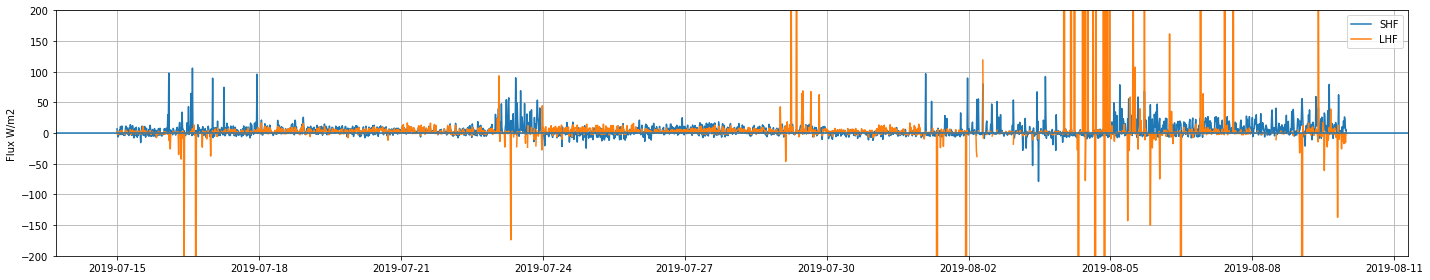

In [18]:

# Plot fluxes

flux_loc = '/Users/heather/ICECAPS-ACE/Processed/'

# Start and stop date:
start = dt.datetime(2019,7,15,0,0)
stop = dt.datetime(2019,8,9,0,0)

# Days to loop through
days = pd.date_range(start,stop,freq='1D')
flux_pro = pd.DataFrame(columns=['Dates', 'SHF', 'LHF'])
for day in days: 
    day_str = str(day.date())
    day_flux = pd.read_csv(flux_loc+'FluxPro_%s'%day_str, index_col=0, parse_dates=[0])
    flux_pro = flux_pro.append(day_flux)


fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(111)
ax1.grid(True)
ax1.plot(flux_pro.index,flux_pro.SHF,label='SHF')
ax1.plot(flux_pro.index,flux_pro.LHF,label='LHF')
ax1.set_ylabel('Flux W/m2')
ax1.axhline(0)
ax1.set_ylim(-200,200)
#ax1.set_xlabel('Frequency (Hz)')
#ax1.legend()

#ax2 = fig.add_subplot(212)
#ax2.grid(True)
#ax2.plot(plot_times,LHF)
#ax2.set_ylabel('LHF W/m2')
#ax2.axhline(0)
#ax1.set_xlabel('Frequency (Hz)')
ax1.legend()

#ax.set_xlim(d1,d2)
fig.tight_layout()




In [ ]:
date

In [ ]:
# Use snow depth sensor to do absolute height correction

In [ ]:
# Calculate bulk richardson number
#Ri = richardson number
#Rig = gradient richardson number: 
#       provides a measure of the balance between shear and bouyant forces 
#       and the resultant turbulent state of the atmosphere, based on mean 
#       wind and thermodynamic profiles. Negative Rig is an indication of 
#       buoyancy-generated turbulence, positive values are associated with 
#       stably stratified turbulence.
# For simplicity, generally refer to Rig>1 as nonturbulent. 

# Rig = g/thetaV * (dthetaV/dz) / ((du**2/dz + dv**2/dz))
# thetaV = virtual potential temperature

# Approximate thetav with theta (potential temperature) for now. 
Rd = 287.0 # J/K/kg - gas constant of 1kg of dry air
P0 = 100000.0 # Standard reference pressure, Pa

# theta = T(P0/P)**(Rd/cp)


